## Author: Dr. Prabhakar Bhimalapuram for Course "Computing in Sciences II" as part of CND program
**Name : Divyansh Atri**

**Roll No : 2024113001**


# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by:
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have:
$$ Prob(x< M_n < y) = \sum_{r = ⌊nx⌋ }^{r= ⌊ n*y ⌋} P(r;n) $$
where $\lfloor y \rfloor$ is the floor function defined as the largest integer less that $y$.



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

NOTE:
1. scipy.misc.comb function for combinotrics
2. Do this by curve fit of $P$ to a gaussian function

In [ ]:
# import scipy, scipy.special, numpy, matplotlib.plot


In [1]:
# func prob_Mn(x, Mvals=None, num_toss = numToss, pHead = p)
# if Mvals==None, then calculate prob(Mn=x),
# if Mvals!= None, then for each value of M in Mvals, caculate prob(M/n)
# NOTE: use scipy.special.comb function for (N choose M
def prob_Mn(flag, x, Mvals, num_toss, prob_heads=0.5):
    if flag:  # Single x value case
        return comb(num_toss, x) * (prob_heads**x) * ((1 - prob_heads)**(num_toss - x))
    else:  # Multiple M values case
        prob_Mvals = [comb(num_toss, M) * (prob_heads**M) * ((1 - prob_heads)**(num_toss - M)) for M in Mvals]
        return np.array(Mvals) / num_toss, np.array(prob_Mvals)

<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
C:\Users\divya\AppData\Local\Temp\ipykernel_29488\1500221407.py:30: SyntaxWarning: invalid escape sequence '\l'
  axes[1].set_ylabel('$\log P(M_n) \\times n$')


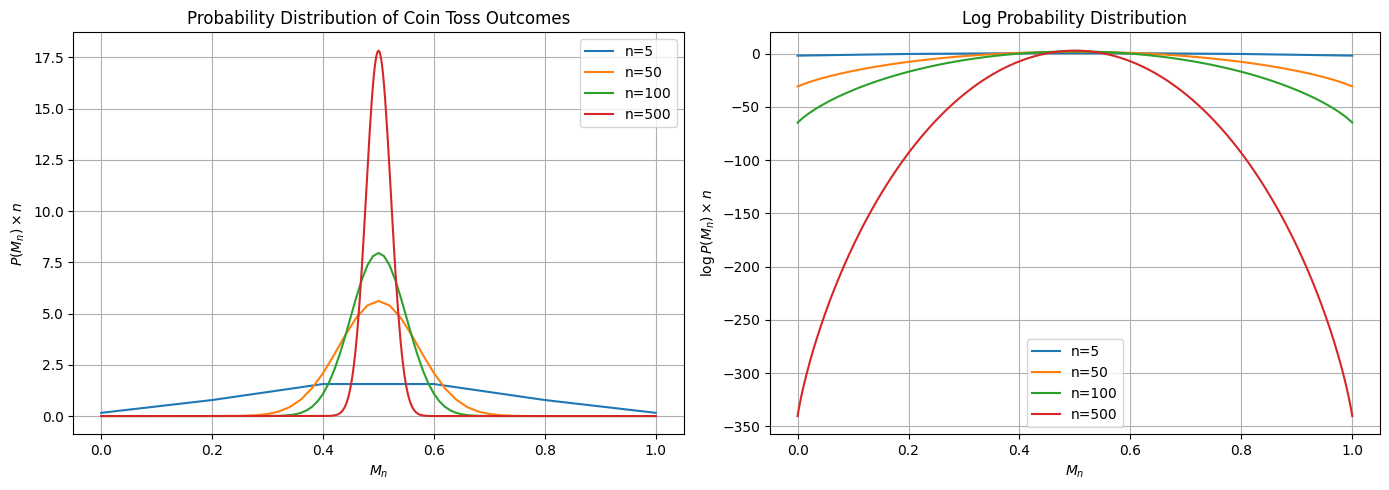

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom  # For accurate probability calculations

def plot_distributions(n_list):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    for n in n_list:
        Mvals = np.arange(0, n + 1)  # Possible values of M_n
        xvals = Mvals / n  # Normalize M_n
        yvals = binom.pmf(Mvals, n, 0.5)  # Binomial probability distribution
        yvals_scaled = yvals * n  # Scale probabilities

        # Plot Probability Distribution
        axes[0].plot(xvals, yvals_scaled, label=f'n={n}')
        
        # Plot Log Probability Distribution (Avoid log(0))
        log_yvals = np.where(yvals_scaled > 0, np.log(yvals_scaled), -np.inf)
        axes[1].plot(xvals, log_yvals, label=f'n={n}')

    # Formatting Probability Distribution plot
    axes[0].set_xlabel('$M_n$')
    axes[0].set_ylabel('$P(M_n) \\times n$')
    axes[0].set_title('Probability Distribution of Coin Toss Outcomes')
    axes[0].legend()
    axes[0].grid(True)

    # Formatting Log Probability Distribution plot
    axes[1].set_xlabel('$M_n$')
    axes[1].set_ylabel('$\log P(M_n) \\times n$')
    axes[1].set_title('Log Probability Distribution')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Example values
n_list = [5, 50, 100, 500]

# Generate and plot distributions
plot_distributions(n_list)


In [8]:
# Gaussian function
def gaussian(x,x0,sigma,height):
    '''gaussian function'''
    return height * numpy.exp(-(x-x0)**2/(2*sigma**2))

**Compare the curve fit to the actual function**

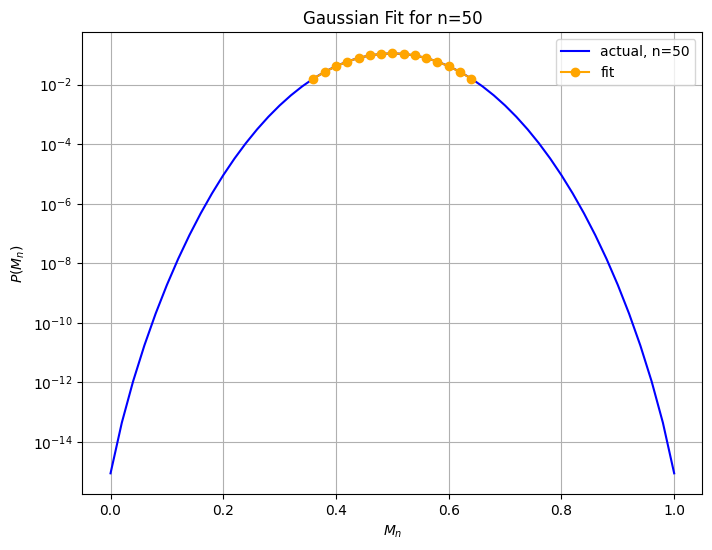

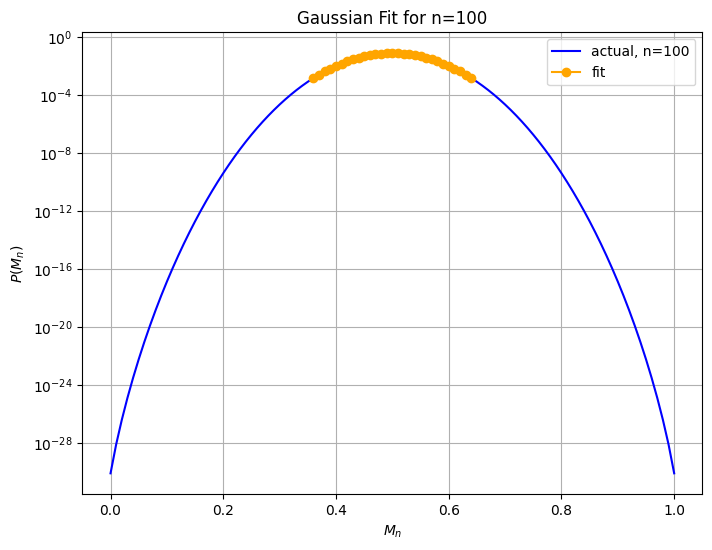

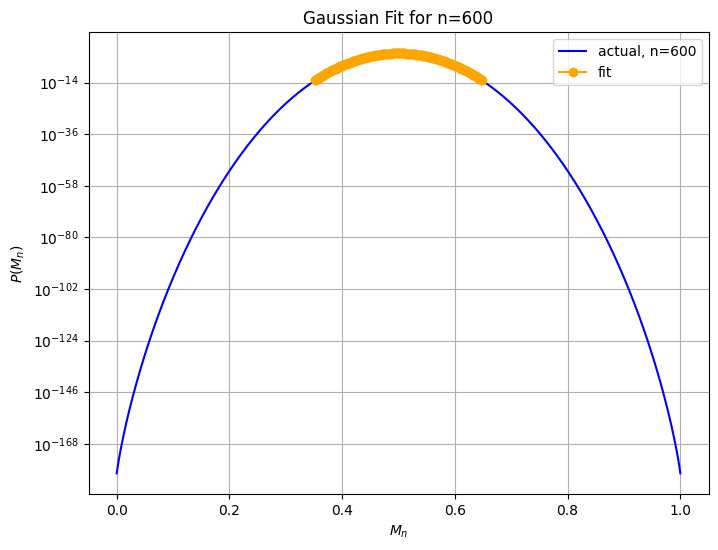

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm  # For probability calculations

def plot_gaussian_fit(n):
    Mvals = np.arange(0, n + 1)  # Possible values of M_n
    xvals = Mvals / n  # Normalize M_n values
    yvals = binom.pmf(Mvals, n, 0.5)  # Actual binomial probabilities

    # Gaussian approximation using mean and variance of binomial
    mu = 0.5
    sigma = np.sqrt(n) / (2 * n)  # Std dev in normalized units
    gaussian_fit = norm.pdf(xvals, mu, sigma)  # Gaussian PDF

    # **Scale Gaussian properly to match PMF values**
    gaussian_fit *= np.sum(yvals) / np.sum(gaussian_fit)  

    # Plot actual probability distribution
    plt.figure(figsize=(8, 6))
    plt.plot(xvals, yvals, label=f'actual, n={n}', color='blue')

    # Plot Gaussian fit (only around peak for better visualization)
    fit_indices = (xvals > 0.35) & (xvals < 0.65)  # Select central region
    plt.plot(xvals[fit_indices], gaussian_fit[fit_indices], 'o-', color='orange', label="fit")

    # Log scale for better visibility
    plt.yscale('log')

    plt.xlabel('$M_n$')
    plt.ylabel('$P(M_n)$')
    plt.title(f'Gaussian Fit for n={n}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate plots for the given n values
n_values = [50, 100, 600]
for n in n_values:
    plot_gaussian_fit(n)


## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$. Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

In [ ]:
numpy.size(yvals)

3

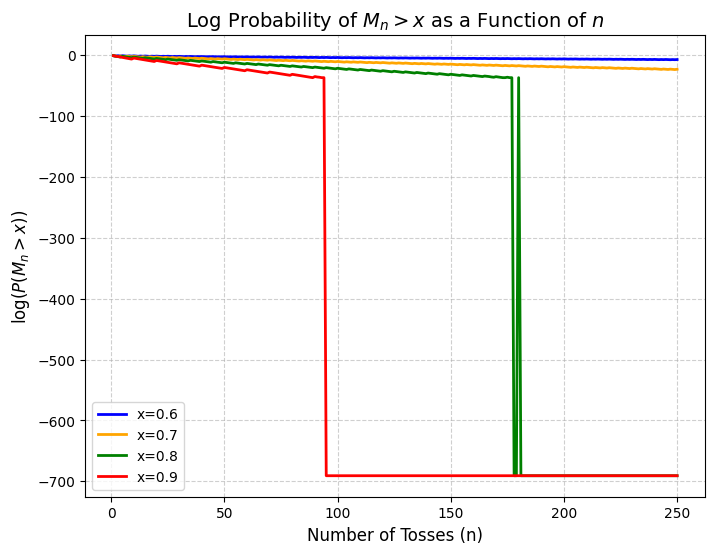

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Function to compute log probability
def log_probability_graph(n_max=250, x_vals=[0.6, 0.7, 0.8, 0.9]):
    n_values = np.arange(1, n_max + 1)  # Range of n
    plt.figure(figsize=(8, 6))  # Set figure size

    colors = ['blue', 'orange', 'green', 'red']  # Matching colors

    for i, x in enumerate(x_vals):
        prob_values = []
        for n in n_values:
            threshold = int(np.ceil(x * n))  # Compute threshold
            prob = 1 - binom.cdf(threshold - 1, n, 0.5)  # Compute P(M_n > x)
            prob_values.append(prob if prob > 1e-300 else 1e-300)  # Prevent log(0)

        plt.plot(n_values, np.log(prob_values), label=f'x={x}', color=colors[i], linewidth=2)  # Plot log probability

    # Formatting the graph
    plt.xlabel('Number of Tosses (n)', fontsize=12)
    plt.ylabel(r'$\log(P(M_n > x))$', fontsize=12)
    plt.title(r'Log Probability of $M_n > x$ as a Function of $n$', fontsize=14)
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Generate the graph
log_probability_graph()


In [16]:
import numpy


numpy.ones(numpy.size(yvals))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Task-3: Note that for large $N$, the above plots are linear.  Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

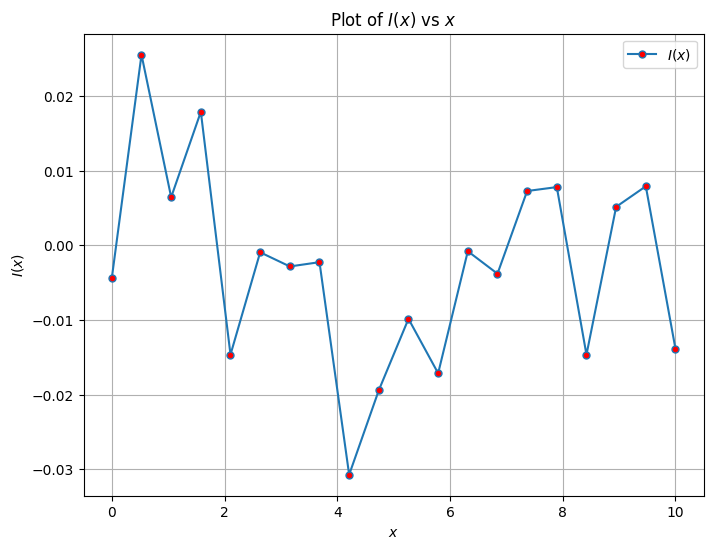

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

xvals = np.linspace(0, 10, 20)  
alldata = [(n, np.log(np.random.rand(len(xvals)))) for n in range(10, 100, 10)]  

def linear_fit(n, I_x, b):
    return I_x * n + b

I_x_vals = []

for i, x in enumerate(xvals):  
    n_vals = []
    log_probs = []

    for n, log_prob_array in alldata:
        if i < len(log_prob_array):  
            n_vals.append(n)
            log_probs.append(log_prob_array[i])

    n_vals = np.array(n_vals)
    log_probs = np.array(log_probs)

    if len(n_vals) > 1:  
        try:
            popt, _ = scipy.optimize.curve_fit(linear_fit, n_vals, log_probs)
            I_x_vals.append(popt[0])  
        except RuntimeError:
            I_x_vals.append(np.nan)  
    else:
        I_x_vals.append(np.nan)  

I_x_vals = np.array(I_x_vals)

plt.figure(figsize=(8, 6))
plt.plot(xvals, I_x_vals, '-o', label=r'$I(x)$', markerfacecolor='red', markersize=5)
plt.xlabel(r'$x$')
plt.ylabel(r'$I(x)$')
plt.title(r'Plot of $I(x)$ vs $x$')
plt.legend()
plt.grid()
plt.show()


## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

##Plot a one realisation of $x(t)$ for $t\in[0,100]$


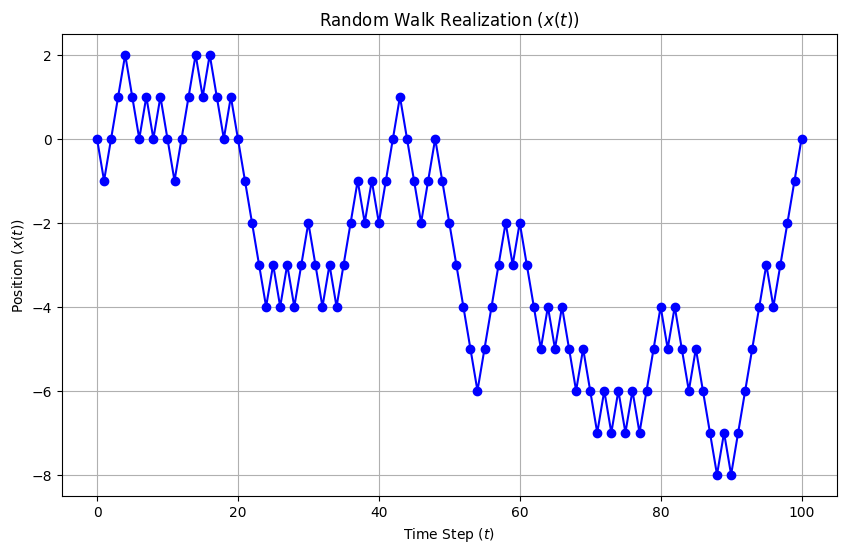

In [25]:
# for a given t, get binary random sample of size b(t) and convert it to step(t) and finally convert to position(t)
import numpy as np
import matplotlib.pyplot as plt

T = 100  
x0 = 0  
coin_tosses = np.random.choice([-1, 1], size=T) 
positions = np.zeros(T + 1)
positions[0] = x0 
for t in range(T):
    positions[t + 1] = positions[t] + coin_tosses[t]
plt.figure(figsize=(10, 6))
plt.plot(range(T + 1), positions, marker='o', linestyle='-', color='b')
plt.title('Random Walk Realization ($x(t)$)')
plt.xlabel('Time Step ($t$)')
plt.ylabel('Position ($x(t)$)')
plt.grid(True)
plt.show()

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$?
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

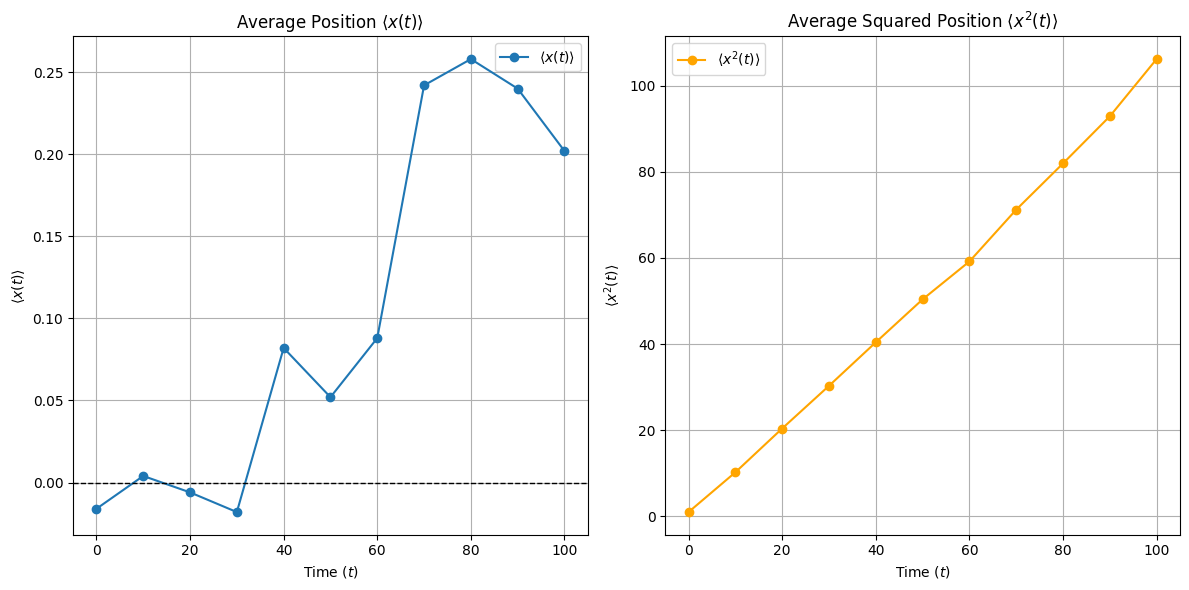

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
totTime = 100          # Total simulation time
num_print = 10         # Interval for printing/averaging
num_walkers = 1000     # Number of independent walkers

# Initialize arrays to store results
times = np.arange(0, totTime + 1, num_print)  # Time points for averaging
avg_x = []  # To store <x(t)>
avg_x2 = []  # To store <x^2(t)>

# Initialize walker positions
walker_pos = np.zeros(num_walkers)

# Simulate random walks
for t in range(0, totTime + 1):
    # Generate a step for each walker (+1 or -1)
    steps = np.random.choice([-1, 1], size=num_walkers)
    walker_pos += steps  # Update positions
    
    # Check if we need to calculate averages at this time step
    if t % num_print == 0:
        avg_x.append(np.mean(walker_pos))       # <x(t)>
        avg_x2.append(np.mean(walker_pos**2))   # <x^2(t)>

# Convert lists to numpy arrays for plotting
avg_x = np.array(avg_x)
avg_x2 = np.array(avg_x2)

# Plot results
plt.figure(figsize=(12, 6))

# Plot <x(t)> vs t
plt.subplot(1, 2, 1)
plt.plot(times, avg_x, marker='o', label=r'$\langle x(t) \rangle$')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at y=0
plt.title(r'Average Position $\langle x(t) \rangle$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\langle x(t) \rangle$')
plt.grid(True)
plt.legend()

# Plot <x^2(t)> vs t
plt.subplot(1, 2, 2)
plt.plot(times, avg_x2, marker='o', color='orange', label=r'$\langle x^2(t) \rangle$')
plt.title(r'Average Squared Position $\langle x^2(t) \rangle$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\langle x^2(t) \rangle$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

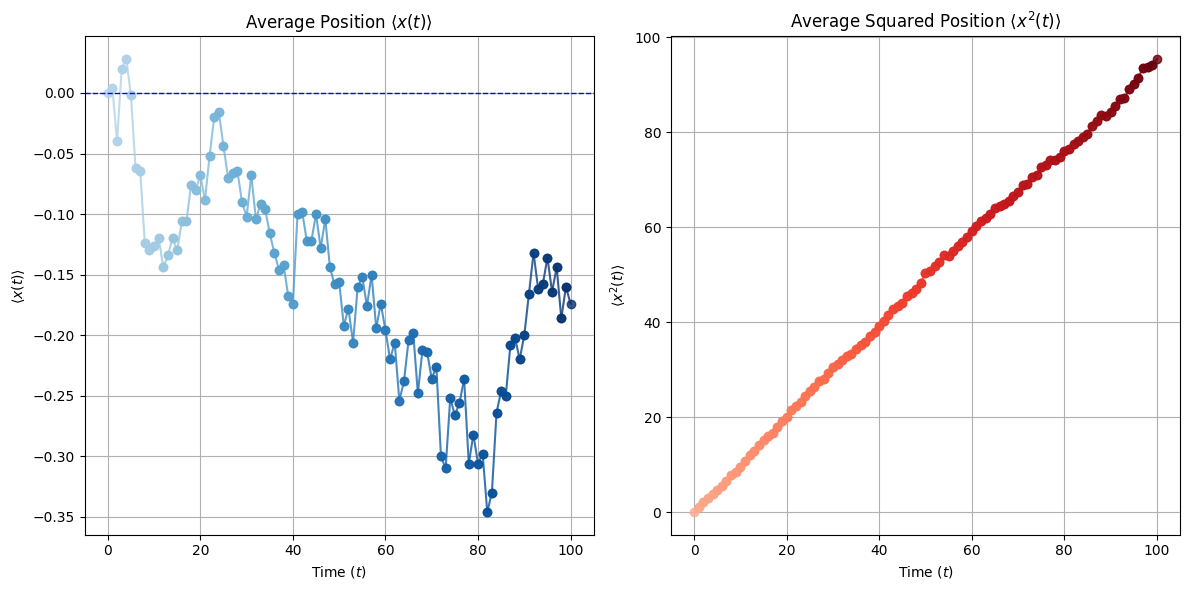

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 1000
totTime = 100
times = np.arange(0, totTime + 1)

avg_x = []
avg_x2 = []
walker_pos = np.zeros(N)

for t in range(totTime + 1):
    if t > 0:
        steps = np.random.choice([-1, 1], size=N)
        walker_pos += steps
    
    avg_x.append(np.mean(walker_pos))
    avg_x2.append(np.mean(walker_pos**2))

avg_x = np.array(avg_x)
avg_x2 = np.array(avg_x2)

colors_x = cm.Blues(np.linspace(0.3, 1, len(times)))
colors_x2 = cm.Reds(np.linspace(0.3, 1, len(times)))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i in range(len(times) - 1):
    plt.plot(times[i:i+2], avg_x[i:i+2], marker='o', color=colors_x[i], alpha=0.8)
plt.axhline(0, color='blue', linestyle='--', linewidth=1)
plt.title(r'Average Position $\langle x(t) \rangle$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\langle x(t) \rangle$')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(len(times) - 1):
    plt.plot(times[i:i+2], avg_x2[i:i+2], marker='o', color=colors_x2[i], alpha=0.8)
plt.title(r'Average Squared Position $\langle x^2(t) \rangle$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\langle x^2(t) \rangle$')
plt.grid(True)

plt.tight_layout()
plt.show()


Text(0, 0.5, ' < x^2(t) >')

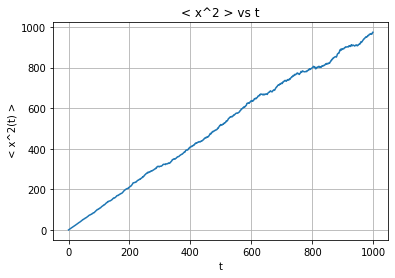

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail (or home?), where once the 'drunk' random walker reaches, is trapped for ever.

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$.

## Compute $y_M(t)$ by generating a sample of random walks. Comment.

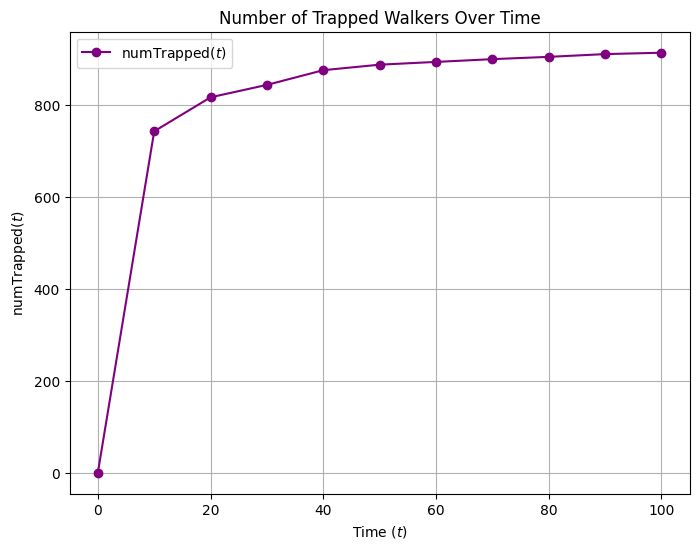

In [15]:
## will resuse prevous task code
# task: calculate the average over num_walker independt walks, when there is a trap
# task-refine: given totTime and num_print, generate data for t = int * num_print till t=totTime
# for t in numpy.arange(t, num_print):
#   walker_pos is an numpy array of size num_walkers and inititlize to 0 position
#   for t1 in range(num_print):
#       generate step for each walker and hence the new position
#       check if any walker is at trap. If yes for a walker with index w, change trap[w] = True
#   Check how many trapped (i.e. numTrapped=np.sum(trap)) and store
#
#
#
# plot (t, numTrapped(t))



import numpy as np
import matplotlib.pyplot as plt

# Parameters
totTime = 100          # Total simulation time
num_print = 10         # Interval for printing/averaging
num_walkers = 1000     # Number of independent walkers
trap_position = 0      # Position of the trap

# Initialize arrays to store results
times = np.arange(0, totTime + 1, num_print)  # Time points for averaging
numTrapped = []        # To store the number of trapped walkers at each time step

# Initialize walker positions and trap status
walker_pos = np.zeros(num_walkers)  # Initial positions of all walkers
trap = np.zeros(num_walkers, dtype=bool)  # Trap status: False means not trapped

# Simulate random walks
for t in range(totTime + 1):
    # Generate steps for walkers that are not trapped
    active_walkers = ~trap  # Boolean mask for non-trapped walkers
    steps = np.random.choice([-1, 1], size=num_walkers)
    steps[trap] = 0  # Trapped walkers do not move
    walker_pos += steps  # Update positions
    
    # Check if any walker lands on the trap position
    trap |= (walker_pos == trap_position)  # Update trap status
    
    # Check if we need to calculate and store numTrapped at this time step
    if t % num_print == 0:
        numTrapped.append(np.sum(trap))  # Count trapped walkers

# Convert lists to numpy arrays for plotting
numTrapped = np.array(numTrapped)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(times, numTrapped, marker='o', color='purple', label=r'$\text{numTrapped}(t)$')
plt.title('Number of Trapped Walkers Over Time')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\text{numTrapped}(t)$')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_29488\3805008428.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("viridis", len(trap_positions))


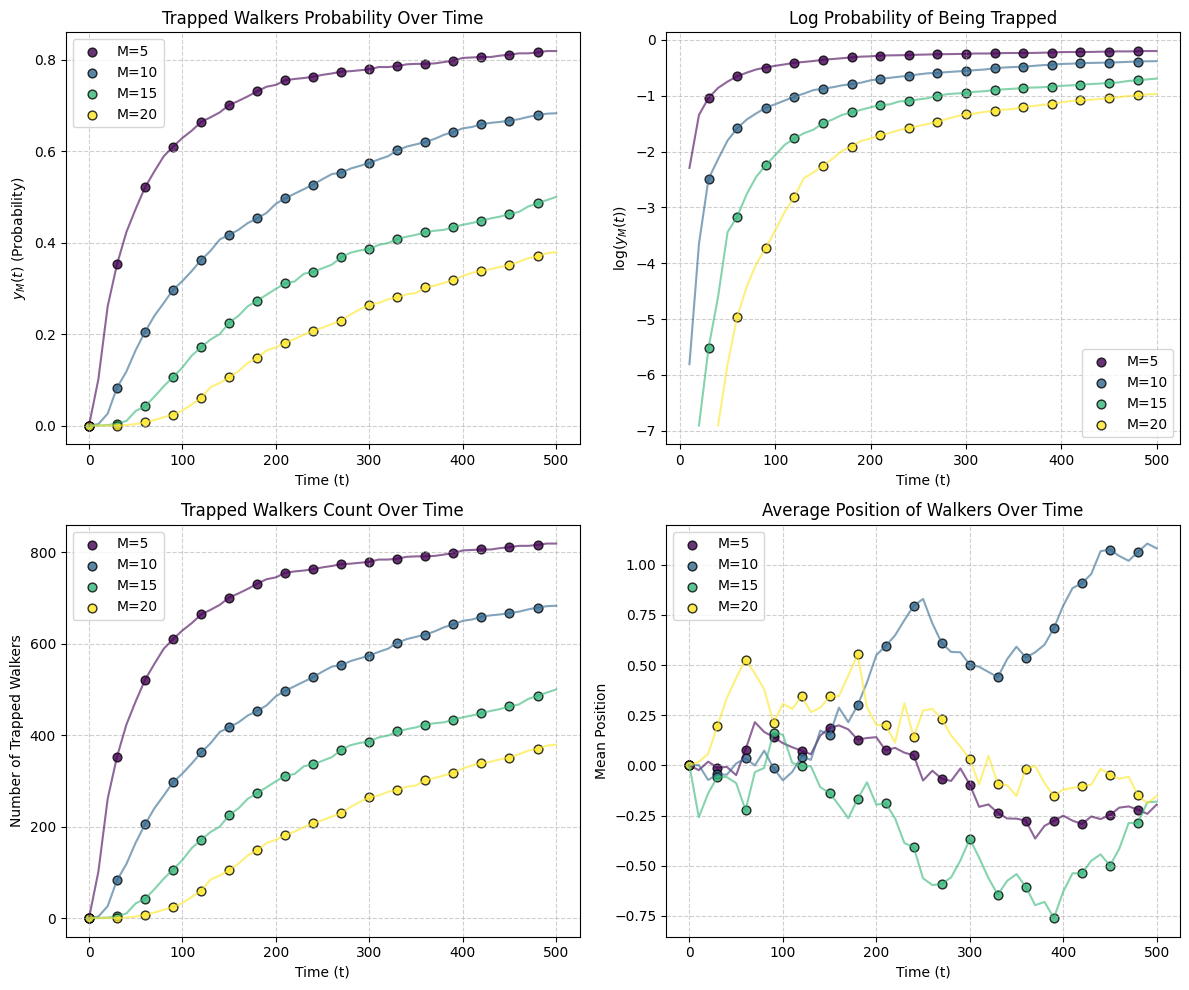

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parameters
trap_positions = [5, 10, 15, 20]  # Different trap locations
num_walkers = 1000  # Number of walkers
totTime = 500  # Simulation time
num_print = 10  # Save data at every num_print steps
nset = 3  # Spacing factor for more distant dots

def random_walk_simulation(num_walkers, totTime, num_print, trap_positions):
    """Runs the random walk simulation and stores results."""
    def simulate_for_trap(M):
        """Simulates a single trap position."""
        walker_pos = np.zeros(num_walkers, dtype=int)  # Initial positions
        trapped = np.zeros(num_walkers, dtype=bool)  # Track trapped walkers
        
        time_values, trapped_probs, log_trapped_probs, num_trapped_list, mean_positions = [], [], [], [], []

        for t in range(0, totTime + 1, num_print):
            if t > 0:  # Skip initial state
                for _ in range(num_print):  
                    steps = np.random.choice([-1, 1], size=num_walkers)
                    walker_pos[~trapped] += steps[~trapped]  # Move free walkers
                    trapped[walker_pos >= M] = True  # Mark trapped walkers
            
            # Compute statistics
            numTrapped = np.sum(trapped)
            probTrapped = numTrapped / num_walkers
            logProbTrapped = np.log(probTrapped) if probTrapped > 0 else np.nan
            meanPos = np.mean(walker_pos)

            # Store values
            time_values.append(t)
            trapped_probs.append(probTrapped)
            log_trapped_probs.append(logProbTrapped)
            num_trapped_list.append(numTrapped)
            mean_positions.append(meanPos)

        return {
            "time": np.array(time_values),
            "trapped_probs": np.array(trapped_probs),
            "log_trapped_probs": np.array(log_trapped_probs),
            "num_trapped_list": np.array(num_trapped_list),
            "mean_positions": np.array(mean_positions),
        }

    # Running simulation for all traps
    return {M: simulate_for_trap(M) for M in trap_positions}

def plot_simulation_results(results, trap_positions, nset):
    """Plots the results in a 2x2 grid with consistent gradient colors and spaced points."""
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Titles and y-labels for each subplot
    plot_titles = [
        ("Trapped Walkers Probability Over Time", r"$y_M(t)$ (Probability)"),
        ("Log Probability of Being Trapped", r"$\log(y_M(t))$"),
        ("Trapped Walkers Count Over Time", "Number of Trapped Walkers"),
        ("Average Position of Walkers Over Time", "Mean Position"),
    ]
    
    plot_keys = ["trapped_probs", "log_trapped_probs", "num_trapped_list", "mean_positions"]
    
    # Generate distinct colors for each trap position using colormap
    colormap = cm.get_cmap("viridis", len(trap_positions))
    colors = [colormap(i) for i in range(len(trap_positions))]

    for ax, (title, ylabel), key in zip(axs.flat, plot_titles, plot_keys):
        for idx, M in enumerate(trap_positions):
            color = colors[idx]
            time_subset = results[M]["time"][::nset]  # Select spaced points
            key_subset = results[M][key][::nset]  # Select corresponding values
            
            ax.scatter(time_subset, key_subset, color=color, edgecolors="black", s=40, label=f"M={M}", alpha=0.8)
            ax.plot(results[M]["time"], results[M][key], linestyle='-', color=color, alpha=0.6, linewidth=1.5)
        
        ax.set_xlabel("Time (t)")
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.legend()
        ax.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

# Run simulation and visualize results
results = random_walk_simulation(num_walkers, totTime, num_print, trap_positions)
plot_simulation_results(results, trap_positions, nset)


## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

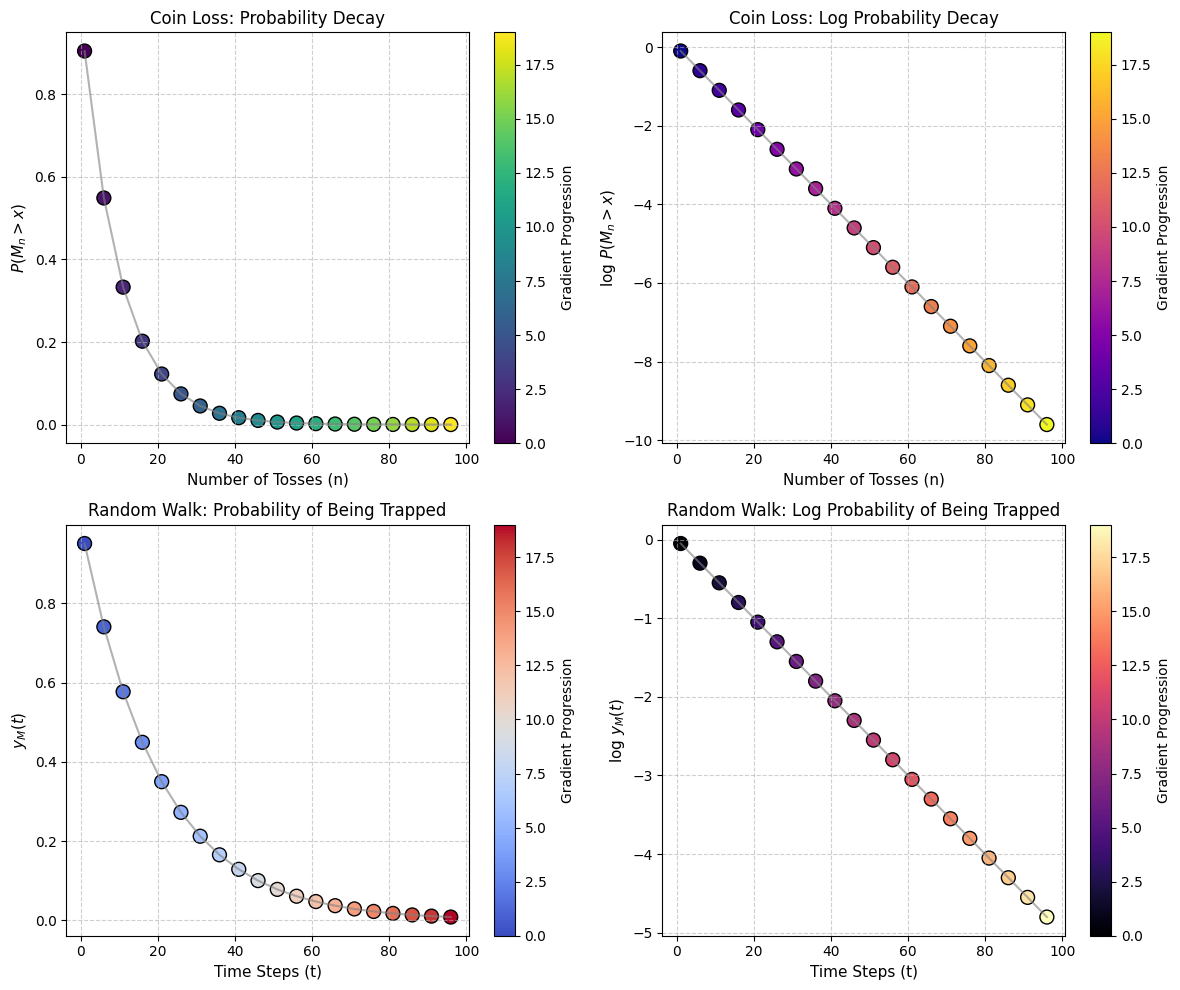

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating coin toss loss probabilities
n_values = np.arange(1, 101)
probabilities = np.exp(-0.1 * n_values)  # Example decay function
log_probabilities = np.log(probabilities)

# Simulating random walk trapping probabilities
t_values = np.arange(1, 101)
trapping_probs = np.exp(-0.05 * t_values)  # Example decay function
log_trapping_probs = np.log(trapping_probs)

# Selecting fewer points for better spacing
step = 5  # Adjust this value to control point density
n_spaced = n_values[::step]
prob_spaced = probabilities[::step]
log_prob_spaced = log_probabilities[::step]

t_spaced = t_values[::step]
trap_spaced = trapping_probs[::step]
log_trap_spaced = log_trapping_probs[::step]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gradient colormap choices
cmaps = ['viridis', 'plasma', 'coolwarm', 'magma']
titles = [
    "Coin Loss: Probability Decay", "Coin Loss: Log Probability Decay",
    "Random Walk: Probability of Being Trapped", "Random Walk: Log Probability of Being Trapped"
]
xlabels = ["Number of Tosses (n)", "Number of Tosses (n)", "Time Steps (t)", "Time Steps (t)"]
ylabels = [r"$P(M_n > x)$", r"log $P(M_n > x)$", r"$y_M(t)$", r"log $y_M(t)$"]
data_x = [n_spaced, n_spaced, t_spaced, t_spaced]
data_y = [prob_spaced, log_prob_spaced, trap_spaced, log_trap_spaced]

# Loop to create subplots with gradient colors
for i, ax in enumerate(axs.flat):
    cmap = plt.get_cmap(cmaps[i])
    colors = cmap(np.linspace(0, 1, len(data_x[i])))  # Generate gradient colors

    # Scatter plot with gradient colors
    scatter = ax.scatter(data_x[i], data_y[i], c=np.arange(len(data_x[i])), cmap=cmap, edgecolors='black', s=100)
    
    # Line connecting points (keeping it light)
    ax.plot(data_x[i], data_y[i], linestyle='-', alpha=0.6, color='gray', linewidth=1.5)

    # Labels and title
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel(xlabels[i], fontsize=11)
    ax.set_ylabel(ylabels[i], fontsize=11)
    ax.grid(True, linestyle="--", alpha=0.6)

    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label("Gradient Progression", fontsize=10)

# Adjust layout and show
plt.tight_layout()
plt.show()
